# Data Mining Coursework Part. 2

# I worked and submitted alone


BSc Computer Science 33680787 Seonjoo Hwang

# Workflow

1. Problem Definition

2. Data Collection and Inspection

3. Data Preprocessing

4. Model Training

5. Evaluation

6. Conclusion

# 1. Problem Definition

Target Variable (Y): The binary target variable represents credit card default payments (1 for Yes, 0 for No).


Features (X1 ~ X23): The remaining 23 columns are input variables, which include demographic factors, credit history, and payment information.



# 2. Data Collection and Inspection

Load dataset to understand its structure, check for missing values, and summarise its features.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load datasets
train_data = pd.read_csv('/content/drive/MyDrive/DM/creditdefault_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/DM/creditdefault_test.csv')

In [3]:
train_data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       15000 non-null  int64
 1   X1      15000 non-null  int64
 2   X2      15000 non-null  int64
 3   X3      15000 non-null  int64
 4   X4      15000 non-null  int64
 5   X5      15000 non-null  int64
 6   X6      15000 non-null  int64
 7   X7      15000 non-null  int64
 8   X8      15000 non-null  int64
 9   X9      15000 non-null  int64
 10  X10     15000 non-null  int64
 11  X11     15000 non-null  int64
 12  X12     15000 non-null  int64
 13  X13     15000 non-null  int64
 14  X14     15000 non-null  int64
 15  X15     15000 non-null  int64
 16  X16     15000 non-null  int64
 17  X17     15000 non-null  int64
 18  X18     15000 non-null  int64
 19  X19     15000 non-null  int64
 20  X20     15000 non-null  int64
 21  X21     15000 non-null  int64
 22  X22     15000 non-null  int64
 23  X23     150

No missing value

No categorical value (integers only)

In [19]:
train_data.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167450.245333,1.604867,1.850000,1.556200,35.367933,-0.020467,-0.130933,-0.163000,-0.214467,...,47117.562067,43077.445667,40272.922667,38708.685867,5615.960000,5.822059e+03,4942.959000,4997.328867,4798.478400,5226.421267
std,0.415069,130109.925023,0.488896,0.786686,0.522743,9.154118,1.125048,1.198451,1.202606,1.180578,...,69182.434940,64016.907786,60503.339354,59212.425410,15551.708028,2.155675e+04,13629.034736,16499.349511,15463.948485,18099.851948
min,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-34041.000000,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2733.500000,2392.750000,1800.000000,1200.000000,1000.000000,8.330000e+02,390.000000,290.000000,204.000000,80.000000
50%,0.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20165.000000,19090.500000,18178.000000,17177.000000,2113.000000,2.014000e+03,1809.000000,1500.000000,1500.000000,1500.000000
75%,0.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,60263.250000,54599.500000,50134.750000,49122.750000,5023.250000,5.000000e+03,4571.500000,4048.500000,4019.500000,4000.000000
max,1.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,706864.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,380478.000000,528897.000000,426529.000000,528666.000000


In [62]:
test_data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       15000 non-null  int64
 1   X1      15000 non-null  int64
 2   X2      15000 non-null  int64
 3   X3      15000 non-null  int64
 4   X4      15000 non-null  int64
 5   X5      15000 non-null  int64
 6   X6      15000 non-null  int64
 7   X7      15000 non-null  int64
 8   X8      15000 non-null  int64
 9   X9      15000 non-null  int64
 10  X10     15000 non-null  int64
 11  X11     15000 non-null  int64
 12  X12     15000 non-null  int64
 13  X13     15000 non-null  int64
 14  X14     15000 non-null  int64
 15  X15     15000 non-null  int64
 16  X16     15000 non-null  int64
 17  X17     15000 non-null  int64
 18  X18     15000 non-null  int64
 19  X19     15000 non-null  int64
 20  X20     15000 non-null  int64
 21  X21     15000 non-null  int64
 22  X22     15000 non-null  int64
 23  X23     150

In [64]:
test_data.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167518.40000,1.602600,1.856267,1.547533,35.603067,-0.012933,-0.136600,-0.169400,-0.226867,...,4.690875e+04,43448.452267,40349.879267,39034.834933,5711.201000,6.020268e+03,5508.404000,4654.824867,4800.296867,5204.583867
std,0.415069,129388.71212,0.489376,0.794008,0.521177,9.280067,1.122579,1.195953,1.191133,1.157593,...,6.951809e+04,64648.862167,61091.551799,59895.370421,17516.924518,2.443534e+04,20835.555914,14784.664100,15090.894847,17449.721214
min,0.000000,10000.00000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-50616.000000,-81334.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.00000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.639000e+03,2290.500000,1729.500000,1307.750000,980.750000,8.327500e+02,390.750000,300.000000,286.750000,156.750000
50%,0.000000,140000.00000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.004050e+04,19012.500000,18025.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1519.000000,1500.000000
75%,0.000000,240000.00000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.000650e+04,54407.000000,50247.250000,49327.000000,5001.000000,5.000000e+03,4500.000000,4001.500000,4041.250000,4007.000000
max,1.000000,1000000.00000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,527143.000000


# 3. Data Preprocessing

Features columns (X1~X23) include demographic factors, credit history, and payment information.

Standardisation is necessary to ensure that the model treats each feature equally when features have different unit .

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# Separate features and target variable
X_training = train_data.drop(columns=['Y'])
y_training = train_data['Y']

X_testing = test_data.drop(columns=['Y'])
y_testing = test_data['Y']

In [73]:
X_training.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


In [74]:
X_testing.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,140000,2,3,1,28,0,0,2,0,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,0,13007,13912,0,0,0,13007,1122,0
4,200000,2,3,2,34,0,0,2,0,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


In [6]:
# Apply scaling
scaler = StandardScaler()

X_training_scaled = scaler.fit_transform(X_training)
X_testing_scaled = scaler.transform(X_testing)

In [76]:
X_training_scaled[:5]

array([[-1.13331216,  0.8082431 ,  0.19067968, -1.06403915, -1.24187957,
         1.79595421,  1.77813178, -0.69601185, -0.66540266, -1.51753654,
        -1.48040468, -0.64832639, -0.64983325, -0.6711257 , -0.67292975,
        -0.66565359, -0.65374752, -0.36112736, -0.23812634, -0.36269067,
        -0.30289045, -0.31031133, -0.28876454],
       [-0.90273021,  0.8082431 ,  0.19067968, -1.06403915,  0.17829364,
         0.01819243,  0.10925575,  0.13554353,  0.18166854,  0.22368951,
         0.24427166, -0.06317216, -0.01715665,  0.03141708, -0.2306256 ,
        -0.1870029 , -0.15473089, -0.23251983, -0.17642667, -0.27464042,
        -0.23621894, -0.24118049, -0.23351363],
       [-0.90273021, -1.23725151,  0.19067968, -1.06403915,  2.36317552,
        -0.87068846,  0.10925575, -0.69601185,  0.18166854,  0.22368951,
         0.24427166, -0.58442766, -0.61383331, -0.16308964, -0.34581776,
        -0.3491977 , -0.33064578, -0.23251983,  1.43156887,  0.37106146,
         0.24260378, -0.2657

In [77]:
X_testing_scaled[:5]

array([[-0.3672653 ,  0.81208103,  0.18102846,  0.86819226, -1.03484019,
        -0.8793142 ,  1.78658531,  0.14222226,  0.19598796,  0.24651789,
         2.01631948, -0.65341319, -0.66435892, -0.63621171, -0.62147716,
        -0.60394781, -0.59729203, -0.32604989, -0.205458  , -0.21638752,
        -0.24721202, -0.31810286, -0.18365283],
       [-0.59913251,  0.81208103,  0.18102846,  0.86819226, -0.17274876,
         0.01152147,  0.11422239,  0.14222226,  0.19598796,  0.24651789,
         0.26218468, -0.29283135, -0.49111638, -0.47974362, -0.4504089 ,
        -0.41581406, -0.39212743, -0.23938796, -0.18499515, -0.21638752,
        -0.24721202, -0.25183553, -0.01172458],
       [-0.21268716,  0.81208103,  1.44050287, -1.05060602, -0.81931733,
         0.01152147,  0.11422239,  1.82135161,  0.19598796,  0.24651789,
         0.26218468, -0.53660461, -0.49014469, -0.50061658, -0.48320253,
        -0.46745958, -0.58964511, -0.13599878, -0.2463837 , -0.24364952,
        -0.24721202, -0.2518

In [7]:
from sklearn.model_selection import train_test_split

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_training_scaled, y_training, test_size=0.2, random_state=42)

# 4. Model Training

- Select and build a model

- Perform cross-validation on the training set


- Hyperparameter Tuning

- Implement the model on test set



## 4-1. Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(max_depth=20, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [8]:
# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.812
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      2339
           1       0.64      0.34      0.45       661

    accuracy                           0.81      3000
   macro avg       0.74      0.64      0.67      3000
weighted avg       0.79      0.81      0.79      3000

Confusion Matrix:
 [[2208  131]
 [ 433  228]]


### Cross-Validation

**Advantages of Cross-Validation:**

**More Robust Evaluation:**

Cross-validation generally provides a more reliable estimate of model performance compared to a single train-validation split.

**Model Stability:**

It helps in assessing the stability of your model across different subsets of data.

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_training_scaled, y_training, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")
print(f"Standard deviation of accuracy: {np.std(cv_scores)}")

Cross-validation scores: [0.80533333 0.81333333 0.81733333 0.832      0.81966667]
Mean accuracy: 0.8175333333333332
Standard deviation of accuracy: 0.008721875435427335




### Cross-Validation Results



**Mean Accuracy and Standard Deviation**

Review the cross-validation scores to understand the model's performance consistency.

Standard Deviation (0.0087) is quite low which indicates that the model's performance is good.


**cross-validation accuracy vs training accuracy**

0.8175 vs 0.812

(If training accuracy is much higher than cross-validation accuracy, your model might be overfitting)

### Hyperparameter Tuning: Find the optimal point

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Initialize a list to store validation accuracies
validation_accuracies = []

# Test different values of max_depth_range
max_depth_range = range(1, 50)
for depth in max_depth_range:
     # Initialize the model with the current value of max_depth
    rf_model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = rf_model.predict(X_val)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(accuracy)

In [12]:
# Print the optimal number of max_depth
optimal_max_depth = max_depth_range[validation_accuracies.index(max(validation_accuracies))]
print(f"The optimal max_depth is: {optimal_max_depth}")
print(f"Maximum validation accuracy: {max(validation_accuracies) * 100:.2f}%")

The optimal max_depth is: 7
Maximum validation accuracy: 82.03%


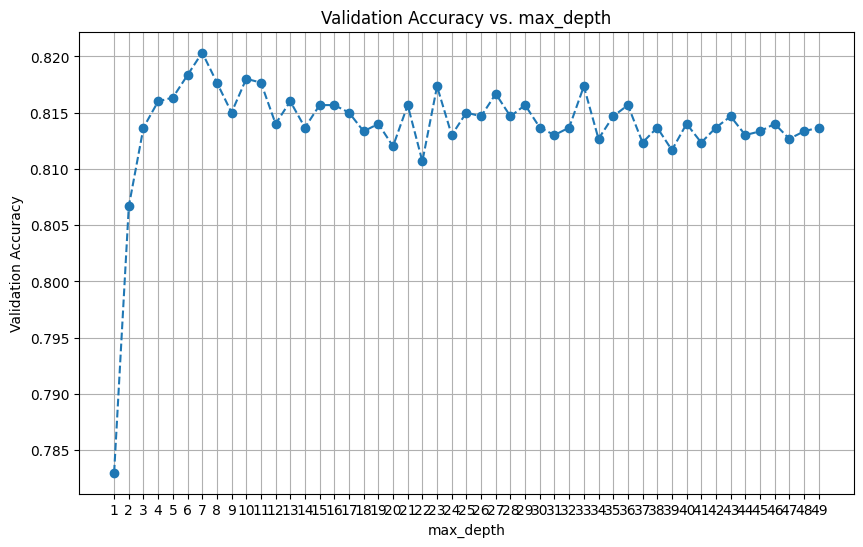

In [13]:
# Plot the validation accuracy vs. max_depth_range
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, validation_accuracies, marker='o', linestyle='--')
plt.title('Validation Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Validation Accuracy')
plt.xticks(max_depth_range)
plt.grid(True)
plt.show()

### Implement on Test Set

In [14]:
# Retrain the model on the entire training set with the best parameters
final_rf_model = RandomForestClassifier(max_depth=7, random_state=42)
final_rf_model.fit(X_training_scaled, y_training)

RandomForestClassifier(max_depth=7, random_state=42)

In [15]:
# Predict on the test set
y_test_pred = final_rf_model.predict(X_testing_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_testing, y_test_pred)
test_report = classification_report(y_testing, y_test_pred)
test_conf_matrix = confusion_matrix(y_testing, y_test_pred)


print(f"Test Accuracy: {test_accuracy}")
print(f"Classification Report:\n{test_report}")
print(f"Confusion Matrix:\n{test_conf_matrix}")

Test Accuracy: 0.8195333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     11682
           1       0.68      0.34      0.46      3318

    accuracy                           0.82     15000
   macro avg       0.76      0.65      0.67     15000
weighted avg       0.80      0.82      0.80     15000

Confusion Matrix:
[[11161   521]
 [ 2186  1132]]


## 4-2. Decision Tree

In [8]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)

In [10]:
# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=30, random_state=42)

In [11]:
# Predict on the validation set
y_val_pred = decision_tree_model.predict(X_val)

In [12]:
# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print the evaluation metrics
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Validation Accuracy: 0.8006666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      2339
           1       0.58      0.35      0.44       661

    accuracy                           0.80      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.78      0.80      0.78      3000

Confusion Matrix:
 [[2169  170]
 [ 428  233]]


### Cross-Validation

In [13]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(decision_tree_model, X_training_scaled, y_training, cv=5)

# Print the cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))


Cross-validation scores: [0.80233333 0.797      0.81133333 0.82166667 0.80966667]
Mean cross-validation accuracy: 0.8084
Standard deviation of cross-validation accuracy: 0.008402116135566998


### Cross-Validation Results

**Mean Accuracy and Standard Deviation**


Standard Deviation (0.0084) is quite low which indicates that the model's performance is good.

**cross-validation accuracy vs training accuracy**

0.8007 vs 0.8084

### Hyperparameter Tuning: Find the optimal point

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Initialize a list to store validation accuracies
validation_accuracies = []

# Test different values of min_samples_leaf
min_samples_leaf_range = range(10, 100)
for leaf in min_samples_leaf_range:

    # Initialize the Decision Tree Classifier with the current min_samples_leaf
    decision_tree_model = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)

    # Fit the model on the training data
    decision_tree_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = decision_tree_model.predict(X_val)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(accuracy)

In [15]:
# Print the optimal number of min_samples_leaf
optimal_min_samples_leaf = min_samples_leaf_range[validation_accuracies.index(max(validation_accuracies))]
print(f"The optimal min_samples_leaf is: {optimal_min_samples_leaf}")
print(f"Maximum validation accuracy: {max(validation_accuracies) * 100:.2f}%")

The optimal min_samples_leaf is: 85
Maximum validation accuracy: 82.13%


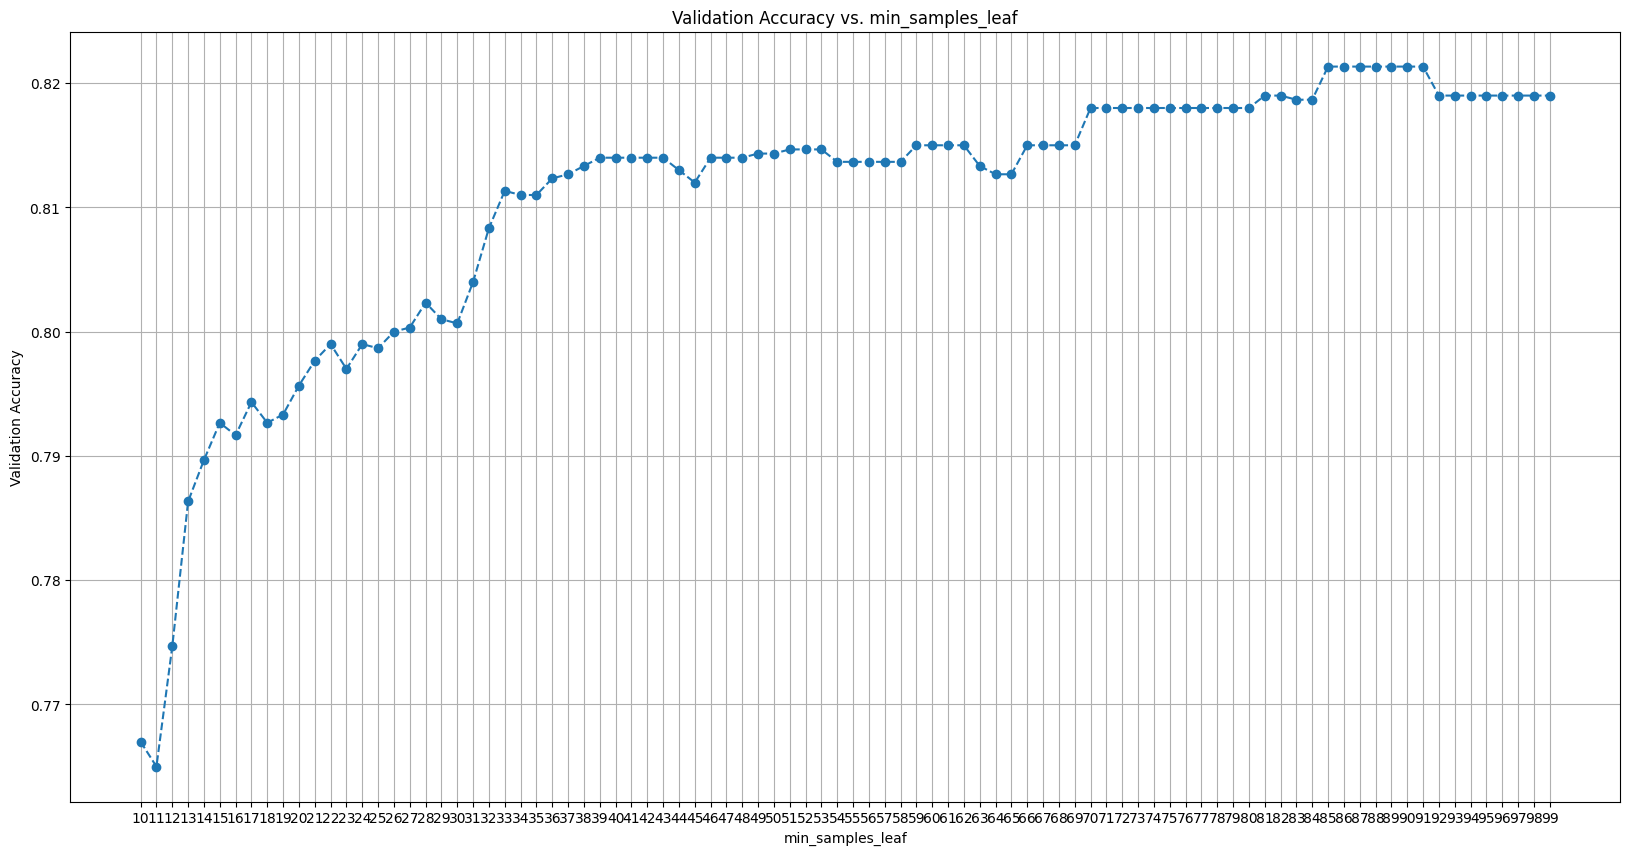

In [16]:
# Plot the validation accuracy vs. min_samples_leaf
plt.figure(figsize=(20, 10))
plt.plot(min_samples_leaf_range, validation_accuracies, marker='o', linestyle='--')
plt.title('Validation Accuracy vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Validation Accuracy')
plt.xticks(min_samples_leaf_range)
plt.grid(True)
plt.show()

### Implement on Test Set

In [17]:
# Retrain the model on the entire training set with the best parameters
final_rf_model = DecisionTreeClassifier(min_samples_leaf=85, random_state=42)
final_rf_model.fit(X_training_scaled, y_training)

DecisionTreeClassifier(min_samples_leaf=85, random_state=42)

In [18]:
# Predict on the test set
y_test_pred = final_rf_model.predict(X_testing_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_testing, y_test_pred)
test_report = classification_report(y_testing, y_test_pred)
test_conf_matrix = confusion_matrix(y_testing, y_test_pred)


print(f"Test Accuracy: {test_accuracy}")
print(f"Classification Report:\n{test_report}")
print(f"Confusion Matrix:\n{test_conf_matrix}")

Test Accuracy: 0.8186
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     11682
           1       0.66      0.38      0.48      3318

    accuracy                           0.82     15000
   macro avg       0.75      0.66      0.68     15000
weighted avg       0.80      0.82      0.80     15000

Confusion Matrix:
[[11029   653]
 [ 2068  1250]]


## 4-3. K-Nearest Neighbour (KNN)

In [27]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=10)

In [29]:
# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [30]:
# Make predictions on the validation set
y_val_pred = knn.predict(X_val)

In [31]:
# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print the evaluation metrics
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Validation Accuracy: 0.8086666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      2339
           1       0.64      0.30      0.40       661

    accuracy                           0.81      3000
   macro avg       0.74      0.62      0.65      3000
weighted avg       0.79      0.81      0.78      3000

Confusion Matrix:
 [[2231  108]
 [ 466  195]]


### Cross-Validation

In [32]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_training_scaled, y_training, cv=5)

# Print the cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))

Cross-validation scores: [0.793      0.81266667 0.801      0.815      0.80866667]
Mean cross-validation accuracy: 0.8060666666666666
Standard deviation of cross-validation accuracy: 0.008081254028098988


### Cross-Validation Results

**Mean Accuracy and Standard Deviation**

Standard Deviation (0.0081) is quite low which indicates that the model's performance is good.

**cross-validation accuracy vs training accuracy**

0.8086 vs 0.8060

### Hyperparameter Tuning: Find the optimal point

In [33]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Initialize a list to store validation accuracies
validation_accuracies = []

# Test different values of n_neighbors
neighbors_range = range(1, 21)
for k in neighbors_range:
    # Initialize the k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = knn.predict(X_val)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies.append(accuracy)


# Print the optimal number of neighbors
optimal_k = neighbors_range[validation_accuracies.index(max(validation_accuracies))]
print(f"The optimal number of neighbors is: {optimal_k}")
print(f"Maximum validation accuracy: {max(validation_accuracies) * 100:.2f}%")


The optimal number of neighbors is: 19
Maximum validation accuracy: 81.03%


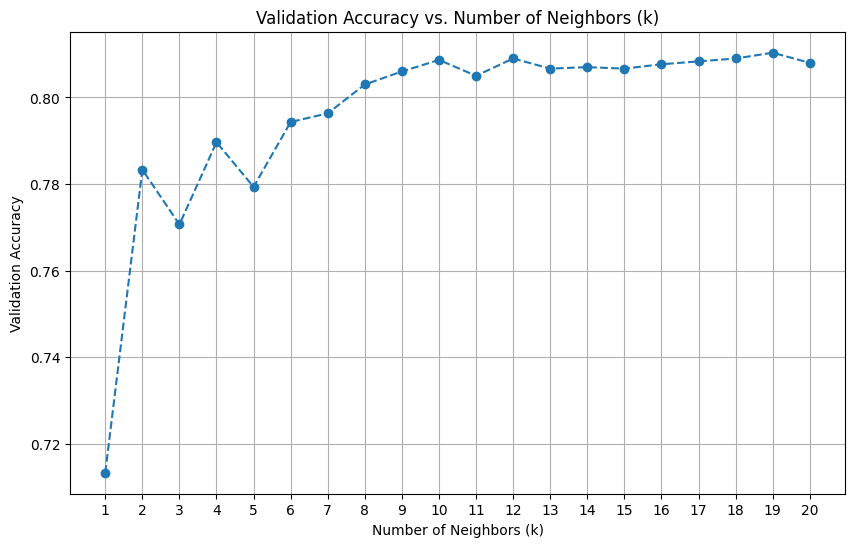

In [34]:
# Plot the validation accuracy vs. the number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, validation_accuracies, marker='o', linestyle='--')
plt.title('Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()

### Implement on Test Set

In [35]:
# Retrain the model on the entire training set with the best parameters
final_rf_model = KNeighborsClassifier(n_neighbors=19)
final_rf_model.fit(X_training_scaled, y_training)

KNeighborsClassifier(n_neighbors=19)

In [36]:
# Predict on the test set
y_test_pred = final_rf_model.predict(X_testing_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_testing, y_test_pred)
test_report = classification_report(y_testing, y_test_pred)
test_conf_matrix = confusion_matrix(y_testing, y_test_pred)


print(f"Test Accuracy: {test_accuracy}")
print(f"Classification Report:\n{test_report}")
print(f"Confusion Matrix:\n{test_conf_matrix}")

Test Accuracy: 0.8110666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11682
           1       0.66      0.31      0.42      3318

    accuracy                           0.81     15000
   macro avg       0.74      0.63      0.65     15000
weighted avg       0.79      0.81      0.78     15000

Confusion Matrix:
[[11144   538]
 [ 2296  1022]]


# 5. Evaluation

Evaluate the performance of the best model on the test dataset.

### 1. Test Accuracy:

Random Forest: 0.8195 (~82%)

Decision Tree: 0.8186 (~82%)

K-NN: 0.8111 (~81%)

---



All three models have similar test accuracy, with Random Forest slightly outperforming the other two.

However, accuracy alone isn't enough to determine which model performs best, especially when the classes are imbalanced or when precision, recall, and f1-score differ significantly.

### 2. Precision, Recall, and F1-Score:

**Class 0 (Majority Class)**:

Random Forest: Precision: 0.84, Recall: 0.96, F1-score: 0.89

Decision Tree: Precision: 0.84, Recall: 0.95, F1-score: 0.89

K-NN: Precision: 0.83, Recall: 0.95, F1-score: 0.89


**Class 1 (Minority Class)**:

Random Forest: Precision: 0.69, Recall: 0.34, F1-score: 0.46

Decision Tree: Precision: 0.66, Recall: 0.37, F1-score: 0.47

K-NN: Precision: 0.66, Recall: 0.31, F1-score: 0.42


---




Class 0: All models perform similarly in predicting the majority class (Class 0), with high precision, recall, and f1-score.

Class 1: Performance for the minority class (Class 1) is where the differences are more apparent:

Random Forest has slightly better precision but lower recall compared to the Decision Tree.
Its f1-score is marginally lower than the Decision Tree.

Decision Tree has slightly better recall and f1-score for the minority class than Random Forest, suggesting it is better at identifying Class 1 instances, albeit with lower precision.

K-NN performs the worst in predicting Class 1, with lower recall and f1-score, indicating it struggles more with the minority class compared to the other models.

### 3. Confusion Matrix Analysis:

**Random Forest:**

True Positives (Class 1 correctly predicted): 1129

False Positives (Class 0 incorrectly predicted as Class 1): 513

False Negatives (Class 1 incorrectly predicted as Class 0): 2189

True Negatives (Class 0 correctly predicted): 11169


**Decision Tree:**

True Positives: 1231

False Positives: 636

False Negatives: 2087

True Negatives: 11046


**K-NN:**

True Positives: 1033

False Positives: 542

False Negatives: 2285

True Negatives: 11140


**Random Forest**: Has the highest number of true negatives and the lowest number of false positives, but it has a high number of false negatives, which means it's missing many Class 1 instances.

**Decision Tree**: Improves on false negatives compared to Random Forest (fewer false negatives), but this comes at the cost of higher false positives.

**K-NN**: Has the highest number of false negatives and the lowest number of true positives for Class 1, indicating it's the weakest at predicting the minority class.

# 6. Conclusion

**Random Forest:**

Strengths: Best overall accuracy, strong performance on the majority class, and balanced precision and recall for Class 1.

Weaknesses: High false negative rate for Class 1, which could be problematic if correctly identifying the minority class is critical.


**Decision Tree:**

Strengths: Similar overall accuracy to Random Forest, with slightly better recall and f1-score for Class 1, suggesting it is better at detecting the minority class.
Weaknesses: Slightly lower precision for Class 1, meaning it has a higher false positive rate.


**K-NN:**

Strengths: Competitive accuracy and good performance on the majority class.

Weaknesses: Struggles with the minority class, resulting in lower recall and f1-score for Class 1, and higher false negatives.

---




If the primary goal is high overall accuracy and robust performance on the majority class, **Random Forest** is the best choice.

If the goal is to improve detection of the minority class (Class 1), even at the cost of some precision, the **Decision Tree** might be preferable.

**K-NN** could be a viable option if computational resources are limited or if the dataset is small, but it performs worse than the other two models in this scenario.
